<div style="font-size: 3em; font-weight: bold; text-align: center;">Neural Networks</div>
<div style="text-align: right; font-size: 24px; margin-right: 10px;">Guillermo Díaz Aguado</div>


In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Introducción
La idea central es extraer combinaciones lineales de las entradas como **features derivadas**, y luego modelizar el target como una función no lineal de esas features.
<div style="text-align:center;">
    <img src="Imagenes_Neural_Network/NN Training summary.png">
</div>

*Deep learning* está inspirado en las funciones del cerebro, tal y como está interconectadas las neuronas en el cerebro, las redes neuronales funcionan de una manera parecida. 

### Enlaces a libros interesantes

[MIT deep learning book](https://github.com/janishar/mit-deep-learning-book-pdf/blob/a1d207f3d31ff3ffd3ac378bce83be4a0eb41acb/complete-book-pdf/Ian%20Goodfellow%2C%20Yoshua%20Bengio%2C%20Aaron%20Courville%20-%20Deep%20Learning%20(2017%2C%20MIT).pdf)

[Deep learning with python](https://sourestdeeds.github.io/pdf/Deep%20Learning%20with%20Python.pdf)



## Definiciones iniciales:
* Neuron/Nodo: Elemento que almacena un número. Generalmente un valor entre 0 y 1
* Layer/Capa: Es un conjunto de neuronas que aplican una operación matemática específica (como una transformación lineal seguida de una función de activación) sobre su entrada, y cuyo resultado se transmite a la siguiente capa.
    * Input Layer/ Capa de Entrada: Son los datos de las variables independientes
    * Hidden Layer / Capas Ocultas: Son las capas intermedias donde se realizan los cálculos para entender el modelo.
        * La **profundidad** indica el número de capas ocultas que tiene el modelo.
        * Los cálculos se realizan con:
            * Los **weights/pesos**: $\alpha$
            * Los **bias/sesgos**: $\alpha_0$
            * La **función de activación**: $\sigma$
            * ***p***: número de componentes de *X*, su rango es 1,..., p
            * ***K***: número de valores de salida, su rango es -> k= 1,...,K
            * ***M***: número de nodos en una capa, su rango es -> m= 1,...,M

* Hiperparametros
    * learning rate: $\eta$

## Aspectos claves de las redes neuronales:
* **Simplicidad**. No hace falta *feature engineering*, ya que las variables que no son importantes, el propio modelo les dará pesos muy pequeños.
* **Escalabilidad**. Tiene una paralelización de tareas muy sencilla.
* **Versabilidad y seusabilidad**. Se puede entrenar datos nuevos sin reiniciar los datos

## Projection Pursuit Regression
Como todos los problemas de aprendizaje supervisado, tenemos un vector de entrada X con *p* variables independientes y un target *y*. Usaremos unos pesos $\omega_m$ siendo $m=1,2,...,p$. El *Prjection Pursuit Regression* PPR tendrá la forma:
$$
f(X)=\sum_{m=1}^{p}g_m(\omega_{m}^TX)
$$
Donde muchas veces para simplificar usaremos:
$$
V_m = \omega_{m}^TX
$$

La función $g_m(\omega_{m}^TX)$ es llamada la *ridge function* in el espacio $\mathbb{R}^p$



# Elementos principales.
## La Neurona.
La **Neurona**, **Nodo** o **Unit** es el <u>componente básico</u> de las redes neuronales, dentro de cada **neurona** donde se realizan los cálculos. 

El procedimiento de traspaso de datos de una neurona se puede simplificar como:
* Recibe los valores de los datos de entrada **Input**.
* Cada nodo de entrada tiene asociado un **peso/weight**.
* Se recibe el sumatorio de la multiplicación de la entrada por los pesos.
* Para que no sea un proceso lineal al resultado anterior se le aplica una función de activación.
* El resultado será el **Output**

![Función de una neurona](Imagenes_Neural_Network/Funcion%20de%20una%20neurona.png)


## Estructura de la red neuronal.
Todas las *neuronas* están organizadas por **Capas/layers** donde se encuentran una o varias neuronas, todas ellas recibirán los mismos datos. Una **capa** es el modulo de procesamiento de datos que tiene como entrada uno o mas tensores y su salida es uno o más tensores. Todas las capas combinadas son las que guardan el *conocimiento* de nuestra red neuronal. 

**INPUT LAYER**->Empezaremos con los nodos de nuestras variables independientes: $X^n$ 
* Todos estos nodos de inicio pasarán sus valores a cada uno de los nodos de la siguiente capa de nuestra red. 
**HIDDEN LAYER**-> Son capas derivadas de las entradas. Estas *capas ocultas* es en donde nuestro modelo entiende las relaciones de la Input layer. 
* El número de nodos que debe haber en estas capas no está definido.
* El número de capas que existán será la **Profundidad/deep** de nuestro modelo.
**OUTPUT LAYER**-> La capa de salida, donde estrá el resultado. 
* El número de nodos de salida dependerá del tipo de problema que tengamos 

### `Layers` en Keras
La clase `Layers` en Keras: Un objeto guardado como `Layers` encapusla algún estado(pesos) y algo de computación(un *forward pass*)
* Los pesos son generalmente definidos con la función `build`, aunque usualmente son creados con el constructor `__init__()`
* La computación es definida con el método `call()`


## De capas a modelos.
Un modelo de deep learning es un grafo creado con muchas capas. 
La **topología** del modelo define una *hypothesis space*. Como sabemos *machine learning* se puede describir como la busqueda de representaciones utilies de unos datos de entrada dentro de un *space of posibilities*. Nosotros elegiremos una topología para nuestra red para empequeñecer nuestro espacio de posibilidades, luego intentaremos encontrar los mejores valores de nuestros parametros para esta topología. 
Para aprender de los datos debemos hacer asumiciones: estas son dependientes de los conocimientos de entrada que tenmos sobre el modelo.
Escoger la estructura adecuada es má un arte que una ciencia, y aunque hya buenas prácticas en las que nos podemoa apoyar, al final será la práctica la que nos enseñe.
### `Models` en Keras 
maefijefoaief mwefjñmaef,asñefsfd´,a

##  `.complie()`
Una vez hemos decidido nuestra arquitectura, tenemos que elegir las siguientes cosas.
* *Loss function (objective function)*: El valor que va a ser minimizado durante el entrenamiento. Representa un medida del éxito.
* *Otimizer*: Determina como la red se actualizará basado en la *loss function*. Implementa una variable especifica de *stochastic gradient descent*  (SGD)
* *Metrics*: Las medidas de éxito que queremos monitorizar durante el training y validation. 

El método de `compile()`configura el proceso de entrenamiento, y serán necesarias las medidas anteriores. 


## `.fit()`
Después de compilar debemos entrenar el modelo con los valores de entrenamiento:
* los *datos*: Tendremos que indicar los *inputs* y *targets*. -> Lo óptimo será usar los datos de entrenamiento y validación.
* Las *epoch*: Cuantas veces deberá iterar el training loop sobre los datos.
* El *batch size*: Número de muestras de entrenamiento consideradas para computar el gradiente para una actualización de pesos.


## Monitorear los *loss y metrics values* en los datos de validación
El objetivo del machine learning no es obtener modelos que trabajen muy bien con los datos de entrenamiento, el objetivo es encontrar un modelo que sea capaz de predecir bien en general, y particularmente en puntos que no han sido vistos en el entrenamiento. Por eso no queremos que nuestro modelo *memorize* un mapeo entre los valores de entrenamiento y sus etiquetas.

Es por ello que se suele reservar un conjunto de datos llamado **validation data**, donde no las usaras de entrenamiento pero si las usarás para computar los *loss values* y *metrics values*. 

### `evaluate()`
Si queremos computar los valores de validación de la función de pérdida y de las metricas podemos usar el método `evaluate()`

## Predicción 
Una vez que ya hemos entrenado nuestro modelo, lo que queremos es que empiece a hacer predicciones en los datos nuevos

### `predict()`
El método `predict()` iterará sobre los datos implementados en pequeños batches y devolverá un Numpy array de predicciones

Dentro de cada nodo interno se calculará el valor de estos nodos internos como una función lineal de la capa anterior, nosotros lo llamaremos $Z_m$ donde *m* será el número de nodos de la capa
$$
\begin{align*}
Z_m &= \sigma(\alpha_{0m}+ \alpha_{m}^{T}X) && Z_m: \text{Variable derivada} \\
&                                          && \sigma: \text{Función de activación} \\
&                                          && \alpha_{0m}: \text{bias} \\
&                                          && \alpha_{m}^{T}: \text{Peso para el nodo m de la capa T} \\
\end{align*}
$$
* La **función de activación $\sigma(v)$** será aquella que usaremos para hacer que los valores de cada nodo varien entre 0 y 1.
* Realmente cada nodo asocia a los nodos anteriores un *bias*, pero como al final es una función lineal de la capa anterior, podemos juntar los *bias* como un único valor.



Las unidades en la parte central de la red son llamadas *hidden unitis*, porque los valores de $Z_m$ no son observados directamente. Podemos imaginar los valores de $Z_m$ como una *expansión de las bases* de las entradas originales X; la **red neuronal** es entonces un modelo lineal estándard, o un modelo multilogistico lineal (usando estas transformaciones como entradas). Pero hay una mejora: en este caso los parametros de la función base son <u> aprendidos desde los datos</u>.
Es por ello que, si la función de activación $\sigma$ fuese la *función identidad*, entonces el modelo complpeto colapsaría en un modelo lineal.

De tal forma, una red neuronal se puede describir como una generalización **no-lineal** de un modelo lineal mediante la introducción de la función de activación $\alpha$

# Principios matemáticos
Las redes neuronales en un principio tienen parametros desconocidos: los **weights(pesos)**, es nuestro trabajo encontrar valores para estos pesos, y conseguir que el modelo encaje bien con los datos de entrenamiento.
Tendremos nuestro set completo de pesos de la siguiente manera:
$$
\begin{align*}
{\alpha_{0m}, \alpha_m; m=1,2,\dots, M}&\quad M(p+1) weights \\
{\beta_{0k}, \beta_k; k=1,2,\dots,K} &\quad K(M+1) weights\\
\end{align*}
$$

* Para regresión, usaremos el SSE *sum-of-squared errors* como nuestra medida de encaje (**función de error**)
$$
R(\theta)=\sum_{k=1}^K\sum_{i=1}^N(y_{ik}-f_k(x_i))^2
$$

* Para clasificación podemos usar *squared error* o *cross-entropy* como **función de error**:
$$
R(\theta)=\sum_{k=1}^K\sum_{i=1}^Ny_{ik}\text{log}f_k(x_i)
$$

De forma general no queremos el **minimo global de $R(\theta)$**, ya que es muy probable que nos de una solución <u>sobreajustada</u>. Para que no se dé el sobreajuste podremos hacerlo de varias formas:
* De manera directa: Con un **término de penalización**
* De manera indirecta: Con un **early stopping**



### Gradient Based Optimization
En la mayoría de los algorítmos de deep learning se busca optimizar una función (ya sea minimizando la función $f(x)$ o maximizando $-f(x)$). La función que queremos minimizar se llamará la **loss function** (o función de coste o de erorr). 

Como generalmente la *función de pérdida* tiene multiples entradas, tendremos que usar **derivadas parciales**.

Las *derivadas parciales* mide como cambia $f$ si tan solo cambiamos la variable $x_i$. El **gradiente** generaliza la noción de una derivada al caso donde la derivada es respecto a **un vector**: 
<u> El gradiente de $f$ es el vector que contiene todas las posibles *derivadas parciales* denotado como:</u>
$$ 
\nabla_xf(x)
$$

La **derivada direccional** en dirección **u**(un vector unidad) es el cambio de la función $f$ en esa dirección. 

Si el gradiente es positivo es que apunta en dirección a una **cuesta arriba**, si el gradiente es negativo, entonces apunta a una **cuesta abajo**. nostros querremos seguir las cuestas abajo para llegar al **mínimo de la función**.

Así pues nos vamos moviendo punto a punto de la siguiente manera:
$$
x´=x- \eta \nabla_xf(x)
$$

Donde $\eta$ es el **learning rate**, el cuál nos idica el tamaño de nuestro paso. 
* **learning rate muy alto**: posiblemente nos saltemos constantemente el mínimo y seguramente nunca lleguemos al valle deseado. Ventaja: irá muy rapido
* **learning rate muy bajo**: ventaja : no nos saltaremos el valle, pero irá muy lento, costoso computacionalemtne


### Backpropagation
Los calculos que hace una capa a los datos de entrada, está almacenado en los **pesos** de esa capa. En esencia podemos decir que las *transformaciones* que hace una capa está **parametrizada** por los pesos -> los **parametros** son los **pesos**. La tarea de una *red neuronal* es encontrar los parametros adecuados para entender el problema. Pero en una red puede haber cientos de miles de parametros, y debemos encontrar los más óptimos para el trabajo.

Para tener una intuición de como cambiar los **pesos** de una capa, debemos saber <u> como de bien está precidiendo</u> la capa. Esto es trabajo de la **función de perdida/loss function**. La *función de perdida* compara las predicciones de la red y el valor real y computa una **puntuación de error / distance score**, capturando así como de bien hace su trabajo la red.

El funcionamiento de este proceso se basa en intentar encontrar un "valle" o un mínimo (nos gustaría encontrar el mínimo global, pero nos puede salir un mínimo local, además el mínimo global puede <u>sobreajustar</u>) de error, para ello tendremos en cuenta dos capas para cada proceso. Este proceso se llama **backpropagation** porque empezamos en las etiquetas finales que es lo que sabemos al 100% como debería ser y vamos retrocediendo capa por capa. 

#### Training loop
1. Dibuja un batch de muestras de entrenamiento, *X*, y sus correspondientes targets *y_true*
2. Corre el modelo con *X* (un paso llamado **forward pass**) para obtener predicciones, *y_pred*.
3. Computa la *loss* del modelo con ese determinado batch y mide la distancia de error entre *y_true* y *y_pred*
4. Actualiza los **pesos** del modelo de tal manera que se reduzca un poco la *loss* en ese batch.
Parece bastante sencillo los pasos anteriores pero en el paso 4, ¿Como somos capaces de reducir el *loss*?¿Y como la podemos reducir solo un poco?

## Fundamentos del machine learning
### El objetivo de todo machine learning: la Generalización.
El problema fundamental en machine leraning es la tensión entre la **optimización** y la **generalización**. 
* **Optimización** se refiere al proceso de ajustar el modelo para conseguir el mejor desempeño posible para los *datos de entrenamiento*
* **Generlización** se refiere en como de bien nuestro modelo actua en datos que no se han visto antes.

#### Underfitting and Overfitting.
* *Underfit*: El modelo no ha sido capaz de encontrar todos los patrones relevantes de los datos de entrenamiento. Aún queda trabajo por hacer.
* *Overfit*: El modelo ha sido cpaz de detectar patrones que no son relevantes (elementos del azar, patrones especificos del training). Esto hace que no se generalice.


<img src="Imagenes_Neural_Network/UnderfittingOverfitting.png" alt="Gráfica de Overfitting-Underfitting" width="70%">


Al principio del entrenamiento, la optimización y la generalización están correlacionadas -> Cuanto menor sea la pérdida en los datos de entrenamiento, menor será también los datos de validación -> Aquí es donde se encuentran los datos más generalizables. **Estamos en Underfit**. -> Aún quedan patrones relevantes que puede aprender.

Después de un número de iteraciones, el modelo deja de aprender las características comunes de este problema y empieza a aprender patrones que solo están en training, estos patrones son irrelevantes o confusos -> **Empezamos a Overfit**


#### Ambiguedad de las características.
En clasificación es común encontrar que hay regiones del *input feature space* que está asociado a varias clases a la vez. Estas categorias no tienen barreras objetivas.

También existen problemas que involucran **aleatoriedad**

<img src="Imagenes_Neural_Network/Uncertainty.png" alt="Ambigüedad" width="70%">

##### Caracteristicas raras y correlaciones falsas
Los modelos de machine learning son susceptibles a sobreajustarse cuando tienen pocas muestras con caracteristicas raras. Ejemplo: Si tu en tu vida solo has visto 2 gatos naranjas y ambos han sido antisociales, entonces pensaras que todos los gatos naranjas serán antisolciales, cuando no está correlacionado.

##### La naturaleza de la generalización en el deep learning
Algo importante de los modelos de deep learning es que pueden ser entrenados para "entender" cualquier cosa.
Te pongo un ejemplo, intenta poner al azar las etiquetas de los datos de MNIST, el modelo se entrenará y será capaz de entender los puntos clave de los datos de entrenamiento, pero en validación estará dando valore de perdida muy malos constantemente. Lo que está haciendo es **memorizar** entradas especificas, tal y como podría hacerlo un diccionario.


#### The Manifold hypothesis
La hipotésis de Manifold que un **high dimensional** dataset que ocurre en el mundo real, puede ser definido en un **low dimensional latent manifold** dentro de este *high dimensional* espacio. Esto significa que muchos datsets que tienen muchas variables, realmente pueden ser descritos por un número más pequeño de variables que están proyectadas en el *sistema de coordenadas local del espacio mainfield*. Este sbuespacio tendrá la cualidad de que estará **altamente estructurado** no como el espacio superior.

Esta hipotesis inplica que:
* Los modelos de machine learning solo tendrán que entrenar un *simple*, *low-dimensional*, *bien estructurado* **subespacio** dentro de su espacio de entrada.
* Dentro de este subespacio, se podrá **interpolar** entre dos entradas, esto significa que se podrá transformar de una a otra mediante *caminos contiguos*.


##### Interpolación como fuente de generalización.
Si trabajas con datos que pueden ser interpolados, puedes empezar a tener una idea de los puntos que no has visto, usando como referencia otros puntos que son cercanos a este en el *mainfold*.

En otras palabras, puedes tener una idea de la **totalidad** del espacio usando únicamente una *muestra* del espacio. Tan solo debes usar la **interpolación** para rellenar los huecos.

Cuidado, que cuando hablamos de **interpolación en el mainfold latente** no me estoy refiriendo a *interpolación lineal*.

Cruacialmente, aunque deep learning consigue la generalización mediante la *interpolación*, sería un error pensar que solo existe este método

El deep learning, por su naturaleza, coge como entrada una *gran y compleja curva* (un manifold) y va ajustando sus parametros hasta que consigue adivinar algunos datos de entrenamiento. La curva involucra tantos parametros que podria modelar cualquier cosa (si lo dejas por mucho tiempo al final acaba *memorizando* las entradas). Si los puntos que usas para entrenar no son puntos aislados, entonces tus datos formarán una **manifold bien estructurada y poca dimensionalidad**. Y como el proceso de entrenamiento ocurre de manera gradual y suave, habrá un punto intermedio donde el modelo se aproxiamará al **natural manifold** de los datos

# Hiperparametros

## Loss function. Escoger una función de pérdida
Elegir una buena *función de pérdida* es extremada importante, puesto que la red buscará cualquier atajo para minimizarla. 

Ejemplo sencillo, imagina una IA omnipotente que tenga como función de pérdida: "Maximizar el bienestar promedio de todos los seres humanos vivos.", para conseguir este objetivo seguramente mate a todos los humanos que tengan un nivel de bienestar bajo. Así que es importante recordar que <u>todas las redes neuronales que crees van a intentar disminuir el valor de la función de pérdida a toda costa</u>


## Funciones de activación. 
Recurso gratuito para visualizar las funciones de activación: [Google developers](https://developers.google.com/machine-learning/crash-course/neural-networks/activation-functions?hl=es-419)

Sin una función de activación, la capa solo será capaz de aprender *transformaciones lineales* de los datos de entrada. ya que la fórmula de cada neurona será así:
$$
\text{Output}=W*Input + b
$$
Entonces la solución a nuestro *hypothesis space* será muy limitado y no se benficiará de las representaciones multilineales. Es por ello que si nosostros queremos que nuestra red neuronal sea capaz de aprender cualquier función matematica deberemos hacer uso de funciones de activación y conseguir que su comportamiento sea **no lineal**.

De todas formas, las funciones de activación lineales pueden llegar a ser utiles en algunos problemas.

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="darkgrid")

In [11]:
def draw_act_func(f):
    x = np.linspace(-10, 10, 1000)
    y = f(x)

    plt.figure(figsize=(3,3))
    plt.plot(x, y)
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.show()


### Función de activación lineal. 
Una neurona lineal coge una combinación lineal de las entradas multiplicadas por sus pesos. 
Las *funciones de activación lineal* son aquellas donde es una función continua y derivable.
#### "linear"
La función simplemente devuelve los valores de entrada. 
$$
linear(x) = x
$$
* Este tipo de neurona de activación no son recomendable usarlas en las capas ocultas de la red, puesto que esto "no es una función de activación". Realmente al usar esto en las capas ocultas, nuestro modelo podría colapsar en una **regresión**
* Solo es útil para las **capas de salida** para problemas de regresión.

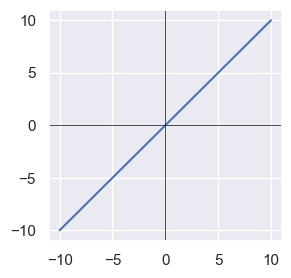

In [12]:
from tensorflow.keras.activations import linear

draw_act_func(linear)

### Función de activación casi-lineales
#### "relu"
La **Rectified Lineal Unit** rectifica los datos negativas devolviendo 0, y los valores positivos no sufren modificación alguna.
$$
\text{ReLU}(x)=max(0, x) 
$$
$$
\mathrm{ReLU}(x) =
\begin{cases}
x & \text{si } x > 0 \\
0 & \text{si } x \leq 0
\end{cases}
$$

##### Argumentos
`keras.layers.ReLU`
* `max_value`: Float >= 0. Valor máximo de activación. Por defecto = None
* `negative_slope`: Float>=0. Coeficiente de *slope* negativo. Por defecto = 0.0
* `threshold`: Float>=0. Valor mínimo para el umbral de activación. Por defecto = 0.0

##### Ventajas:
* No existe saturación. Hace que el *gradient descent* converja mucho más rápido.
* Es más fácil de implementar computacionalmente.

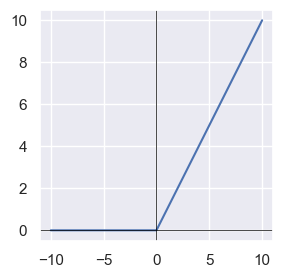

In [13]:
from tensorflow.keras.activations import relu

draw_act_func(relu)

#### "sigmoid" o logit
Aplica la función logaritmíca, escalando entre [0, 1]. Se llama **sigmoid** porque hace una *S* 
$$ 
\sigma(x)=\frac{1}{1+e^{-x}}
$$

* Se suele usar para **capas de salida en clasificación binaria**.
* A veces en capas ocultas (aunque hoy se prefuere `relu`)

Desventajas:
* El **gradiente se aplana** -> en los extremos la derivada se acerca a 0, aprendizaje lento. 
* Salida no centrada en 0, está centrada en 0.5


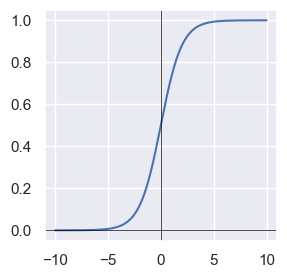

In [14]:
from tensorflow.keras.activations import sigmoid

draw_act_func(sigmoid)

* Para valores grandes negativos $\sigma(x) \approx 0$
* Para valores grandes positivos $\sigma(x) \approx 1$
* En x=0 : $\sigma(0)=0.5$

#### "softmax"
Función similar a la *sigmoid*
* Calcula la probabilidad de evento para n clases diferentes, donde la suma de todas las posibilidades será igual a 1. Buena para determinar **problemas de calsificación multiclase**.
$$
\text{softmax}(z_i)=\frac{e^{z_i}}{\sum^k_{j=1}e^{z_j}}
$$

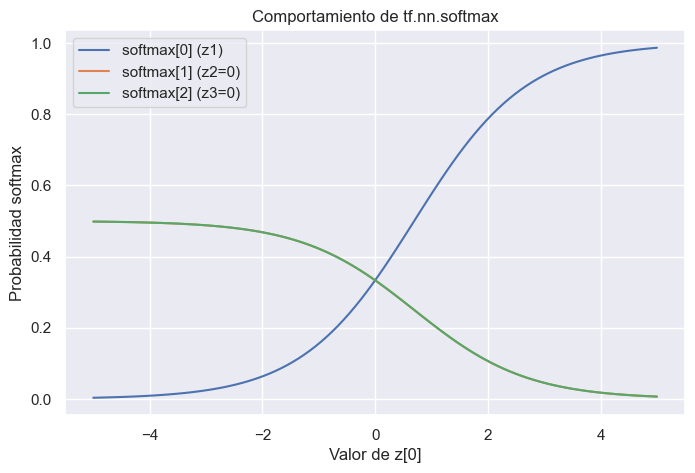

In [15]:
from tensorflow.keras.activations import softmax

z_vals = np.linspace(-5, 5, 100)
softmax_outputs = []

for z1 in z_vals:
    z = tf.constant([z1, 0.0, 0.0], dtype=tf.float32)
    s = tf.nn.softmax(z).numpy()
    softmax_outputs.append(s)

softmax_outputs = np.array(softmax_outputs)

# Graficar los resultados
plt.figure(figsize=(8, 5))
plt.plot(z_vals, softmax_outputs[:, 0], label='softmax[0] (z1)')
plt.plot(z_vals, softmax_outputs[:, 1], label='softmax[1] (z2=0)')
plt.plot(z_vals, softmax_outputs[:, 2], label='softmax[2] (z3=0)')

plt.title('Comportamiento de tf.nn.softmax')
plt.xlabel('Valor de z[0]')
plt.ylabel('Probabilidad softmax')
plt.grid(True)
plt.legend()
plt.show()

#### "tanh"
La función **tangente hiperbólica** es una función que transforma los valores de entrada en un rango entre [-1, 1]
$$
\text{tanh}(x)=\frac{e^x-e{-x}}{e^x+e^{-x}}
$$

* Se suele usar en **redes recurrentes**(RNN)

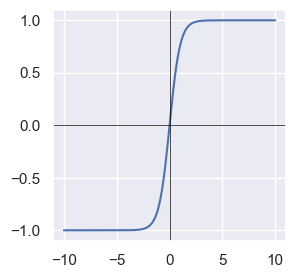

In [16]:
from tensorflow.keras.activations import tanh

draw_act_func(tanh)

# Clasificación y regresión en redes neuronales.
## Introducción.
* *Binary classification*: Una tarea de clasificación donde cada entrada debe estar categorizada en **2 categorias exclusivas**
* *Multiclass classification*: Una tarea de clasificación donde cada entrada debe estar categorizada en **más de 2 categorías exclusivas**
* *Multilabel classification*: Una tarea de clasificación donde cada entrada estará categorizada en **más de 2 categorias no exclusivas**
* *Scalar regression*: Una tarea de clasificación donde la salida será un **valor escalar**
* *Vector regression*: Una tarea de clasificación donde la salida será un **vector**

# Algunos problemas entrenando Redes Neuronales.
Entrenar una red neuronal es casi un arte. Los modelos generalmente están sobreparametrizados, y el problema de la optimización es *no-convexo* e *inestable*, por ello algunas reglas deben aplicarse. Son las siguientes reglas:

## Valores iniciales.
Supongamos que iniciamos los pesos (y todos los parametros del modelo) con un valor igual a 0. Debido a como se realiza el **gradient descent**, muchas veces podemos toparnos con zonas concavas que dan a un mínimo local, el cuál puede estar lejos de la solución. Al ser un mínimo, es gradient descent no nos da ninguna dirección de adonde seguir, quedandonos estancados en una cuenca con un mínimo local.
La mejor forma es realizar varios cálculos del modelo, donde los <u> valores inicales de los parametros del modelo son elegidos aleatoriamente</u>
Uno deberá probar con unos cuantos *puntos iniciales aleatorios*, y elegir aquel que dé la solución menos penalizada. Aunque una solción mas acertada es elegir <u>la media de las predicciones</u> de cada punto inicial. La solución anterior es mejor que hacer la media de los pesos, ya que la *no-lienealidad* del modelo implica que este procedimiento pueda ser pobre.


## Overfitting (sobreajuste)
Usualemente las redes neuronales tienen demasiados pesos lo que provoca que el modelo se *sobreajuste* al mínimo global de $R$.

## Escalado de las entradas
Tal y como pasa en los modelos linales, es necesario aplicar un escalado a las variables para que aquellas de mayor magnitud no opaquen aquellas de menor magnitud. Al principio, es mejor estandarizar todas las entradas para que tengan media=0 y std desviation=1.
Además de estadarizar las magnitudes, también nos permite elegir entre un rango uniforme de pesos aleatorios de entrada [-0.7, +0.7]


## Número de nodos y capas escondidas (hidden units and layers)
Generalmente hablando, es mejor tener **muchos nodos escondidos** que **muy pocos nodos escondidos**.
* Con <u>muy pocos nodos</u> el modelo tal vez no tenga la suficiente elasticidad para capturar las *no-linealidades*
* Con <u>muchos nodos</u> los *nodos extra* tendrán valor casi **nulo** si la regularización es buena.
Para elegir las capas internas se necesita un conocimiento del dataset y experimentación. Cada capa extrae caracteristicas de las entradas